# EMAIL SPAM DETECTION WTITH MACHINE LEARNING

The goal of this project is to detect spam emails and ham emails we reached, with help of keyword dataset that tells the email
could be spam.
Email spam dector is build with python, then we train a machine learning mode to recognize and classify emails into spam and 
non-spam(ham)

### IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

### LOADING THE DATASET

In [3]:
df=pd.read_csv('spam.csv',encoding="latin1")
print(df)

     label                                            message Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


Here we used UnicodeDecodeError to avoid illegal sequence of characters in string may cause coding specific decode error

In [4]:
df.columns

Index(['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

unnamed 2,3,4 columns are unwanted since their values are NaN.So, drop those.

### DROPPING THE UNWANTED COLUMNS

In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

### FIRST FIVE ROWS OF THE EDITED DATASET

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### COUNT NO. OF HAM AND SPAM MESSAGES IN OUR DATASET AND VISUALIZING IN A PICTORIAL WAY

ham     4825
spam     747
Name: label, dtype: int64


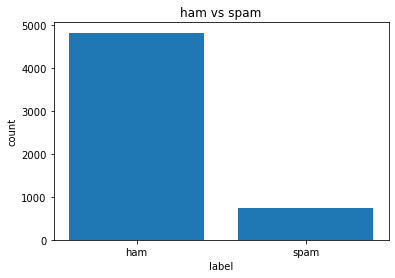

In [7]:
count=df.label.value_counts()
print(count)
plt.bar(count.index,count.values)
plt.title('ham vs spam')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

### CHECKING FOR MISSING VALUES

In [8]:
df.isnull().any()

label      False
message    False
dtype: bool

We can see there are no missing values in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Our dataset is type of categorical, training model cannot understand string format.So we have to encode the data.

### ENCODING THE CATEGORICAL DATA

In [11]:
df.replace({'label':{'ham':0,'spam':1}},inplace=True)

Here, we replaced 'ham' with 0,
and, 'spam' with 1.

In [12]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### CONVERTING MESSAGE COLUMN(TEXT) INTO NUMERICAL 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

### SEPERATING THE INPUT AND OUTPUT COLUMNS

In [17]:
x=df['message']
y=df['label']
x=cv.fit_transform(x)

x is message column that is converted into numerical data for machine learning model.

### SEPERATING TRAINING AND TESTING DATA

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
print(y_train)

4502    0
2853    0
2386    0
758     0
1616    0
       ..
4789    0
2648    0
3399    1
1430    0
3508    0
Name: label, Length: 4457, dtype: int64


message (string) in converted into numeric format for input here.

### FITTING THE MODEL USING LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### MODEL PREDICATION AND FINDING ACCURACY

In [45]:
prediction = model.predict(x_test)
print(prediction)

[1 0 0 ... 0 0 0]


In [46]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, prediction)*100)

Accuracy: 98.11659192825111


###### Note: We need to seperate train and test data. And fit the data again into the model and train it until the accuracy reaches above 98%

### PREDICTING NEW MESSAGES INTO HAM AND SPAM

Hey, just checking in to see how you're doing."----->ham message

The IRS is Trying to Contact You",------>ham message

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."------>ham message

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"------>spam message

#### check the model prediction for above test data.

In [47]:
msg = ["Hey, just checking in to see how you're doing.",
            "The IRS is Trying to Contact You",
            "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
            "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
x_new = cv.transform(msg)
y_new = model.predict(x_new)

### PRINT PREDICTIONS

In [48]:
for i in range(len(y_new)):
    print("{0}. {1}-{2}".format(i,msg[i],y_new[i]))

0. Hey, just checking in to see how you're doing.-0
1. The IRS is Trying to Contact You-0
2. Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...-0
3. Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's-1


Predicted in the correct way.